In [1]:
# Importing imporant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset and printing first 5 rows

df = pd.read_csv('HousingPrices-Amsterdam.csv')
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [3]:
# Dropping unusual columns.

df.drop(['Unnamed: 0','Address','Zip'], axis='columns', inplace=True)

In [4]:
# Checking the rows and columns.

df.shape

(924, 5)

In [5]:
# Checking information about dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    924 non-null    int64  
 2   Room    924 non-null    int64  
 3   Lon     924 non-null    float64
 4   Lat     924 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.2 KB


In [6]:
# Checking null value in dataset.

df.isnull().sum()

Price    4
Area     0
Room     0
Lon      0
Lat      0
dtype: int64

In [7]:
# Filling 'Price' Column as there's Null value available.

df.Price.fillna(df.Price.mean(), inplace=True)

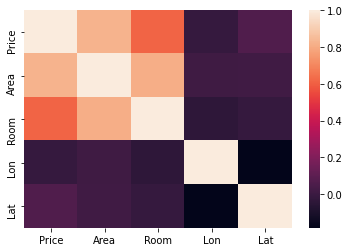

In [8]:
# Checking the Correalation between available column in dataset using heatmap (seaborn).

corr =df.corr()
sns.heatmap(corr)

In [9]:
# Separating features (X) and printing it.

X = df.iloc[:,1:]
X

,Area,Room,Lon,Lat
0,64,3,4.907736,52.356157
1,60,3,4.850476,52.348586
2,109,4,4.944774,52.343782
3,128,6,4.789928,52.343712
4,138,5,4.902503,52.410538
...,...,...,...,...
919,117,1,4.927757,52.354173
920,72,3,4.890612,52.414587
921,51,3,4.856935,52.363256
922,113,4,4.965731,52.375268


In [10]:
# Separating label (y) and printing it

y = df['Price']
y

0      685000.0
1      475000.0
2      850000.0
3      580000.0
4      720000.0
         ...   
919    750000.0
920    350000.0
921    350000.0
922    599000.0
923    300000.0
Name: Price, Length: 924, dtype: float64

In [11]:
# Importing 'train_test_split' from sklearn and spliting data in training and testing part.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Importing support vector machine and using Regressor from there.

from sklearn.svm import SVR

In [13]:
# Creating class (Model) using support vector regressor.

support_vector_regressor = SVR(kernel='linear',C=32000)

In [14]:
# Fitting Model with training data.

support_vector_regressor.fit(X_train, y_train)

SVR(C=32000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
# Checking the accuracy score on test  data.

support_vector_regressor.score(X_test, y_test)

0.7560554415280045